In [23]:
# used to manipulate the Python runtime environment or access command-line arguments
import sys
# used for random data augmentation, shuffling datasets, or other tasks that involve randomness
import random
# used for image loading, preprocessing, and manipulation
import cv2
import numpy as np
#  used for handling medical imaging data.
import nibabel as nib
# provides tools for building and training neural networks. In your code, it is likely used for deep learning tasks
import torch
#  includes classes like Dataset and DataLoader to facilitate efficient data processing during training and evaluation.
from torch.utils.data import Dataset, DataLoader, ConcatDataset
#  used for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt



## data preprocessing

In [22]:
# checking the length of the images files, and if all the images are of jpg format

def check_image_folder(image_folder):
    # Get a list of all files in the folder
    all_files = os.listdir(image_folder)

    # Filter files with ".jpg" extension
    jpg_files = [f for f in all_files if f.endswith(".jpg")]

    # Check if all files have the ".jpg" extension
    all_files_are_jpg = len(all_files) == len(jpg_files)

    return all_files_are_jpg, len(all_files)

# Replacing the path with our current paths
class_1_image_folder = "./data/Training/glioma"
class_2_image_folder = "./data/Training/meningioma"
class_3_image_folder = "./data/Training/notumor"
class_4_image_folder = "./data/Training/pituitary"

# Checking and printing the results for each class
for class_folder in [class_1_image_folder, class_2_image_folder, class_3_image_folder, class_4_image_folder]:
    all_files_are_jpg, num_files = check_image_folder(class_folder)
    class_name = os.path.basename(class_folder)
    print(f"Class {class_name}:")
    print(f"  All files in the folder are .jpg: {all_files_are_jpg}")
    print(f"  Number of files in the folder: {num_files}\n")


Class glioma:
  All files in the folder are .jpg: True
  Number of files in the folder: 1321

Class meningioma:
  All files in the folder are .jpg: True
  Number of files in the folder: 1339

Class notumor:
  All files in the folder are .jpg: True
  Number of files in the folder: 1595

Class pituitary:
  All files in the folder are .jpg: True
  Number of files in the folder: 1457



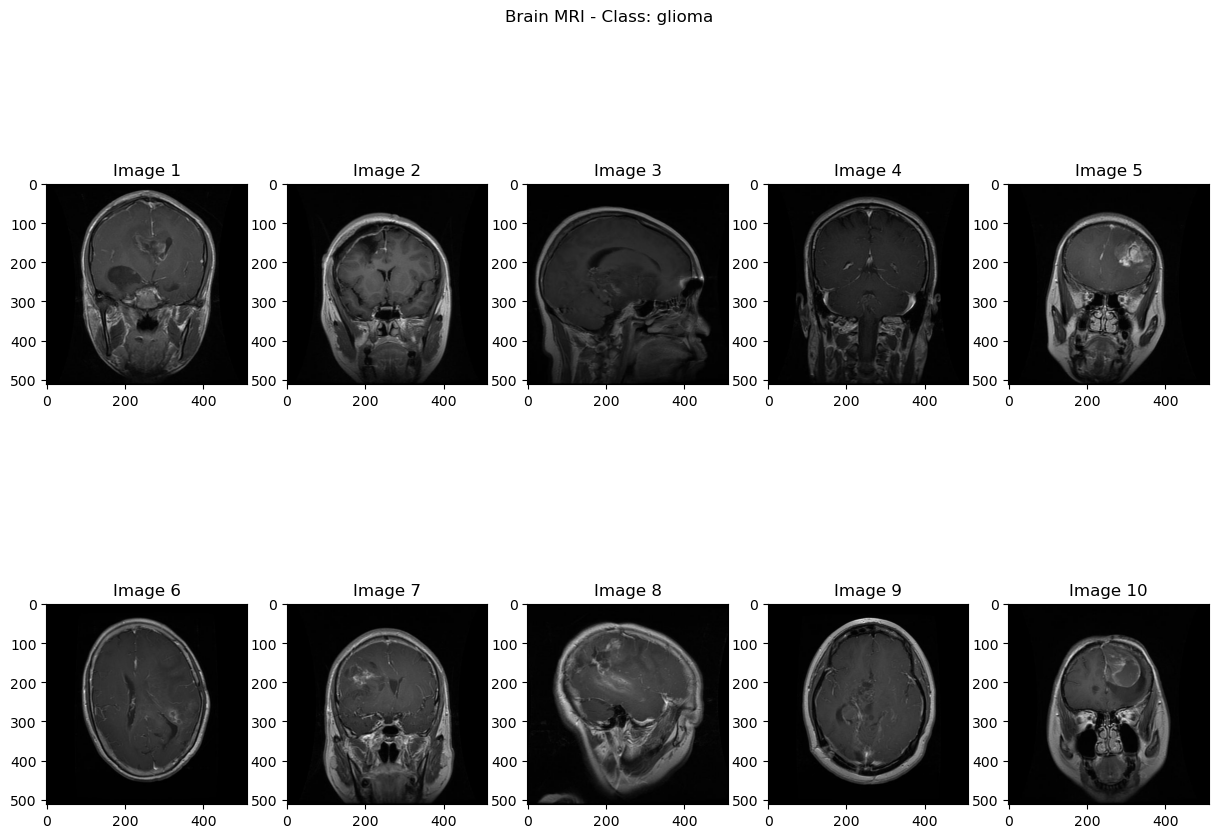

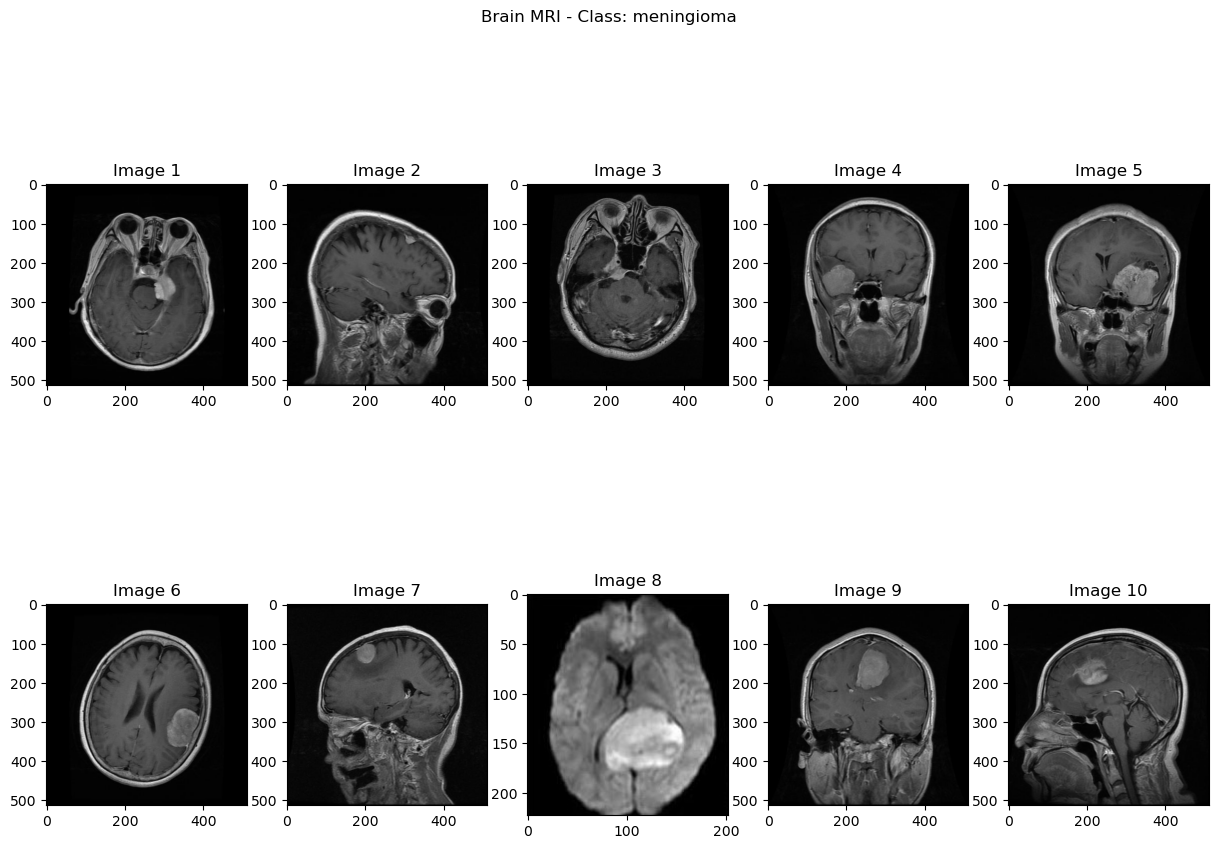

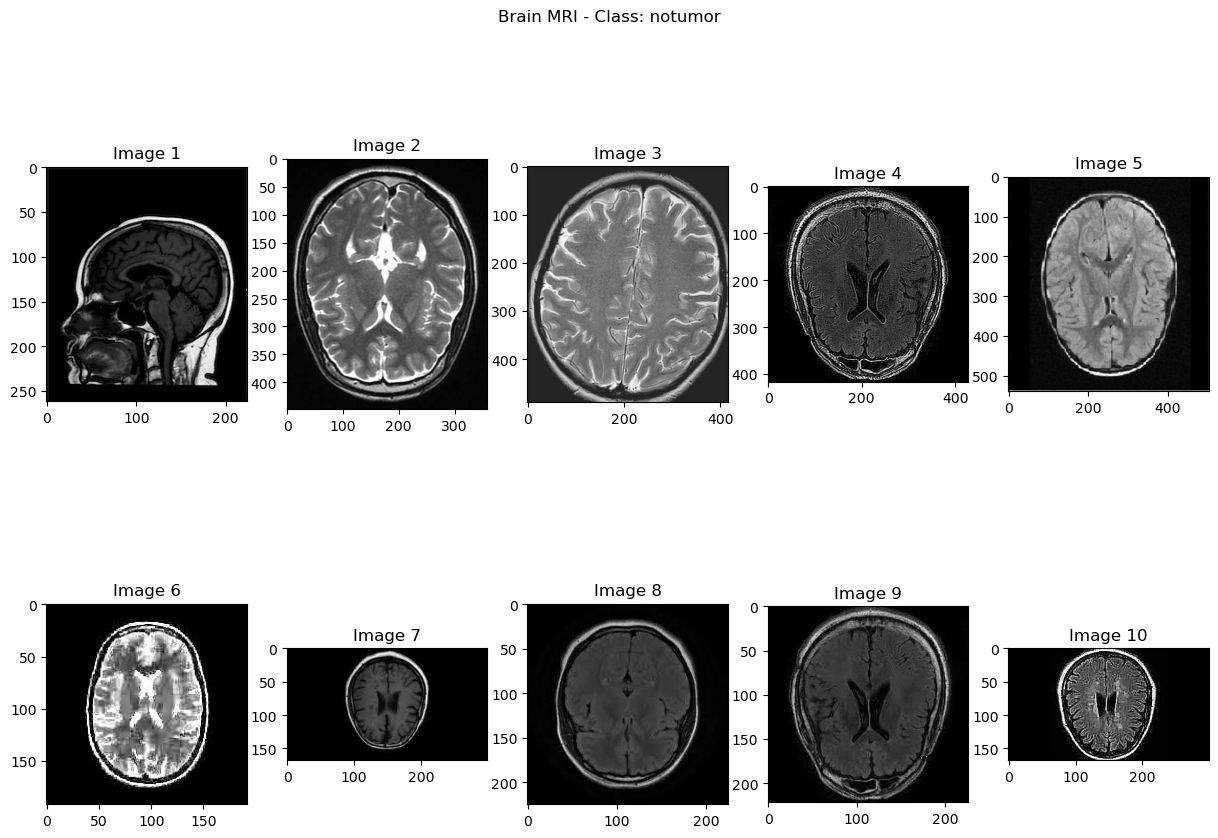

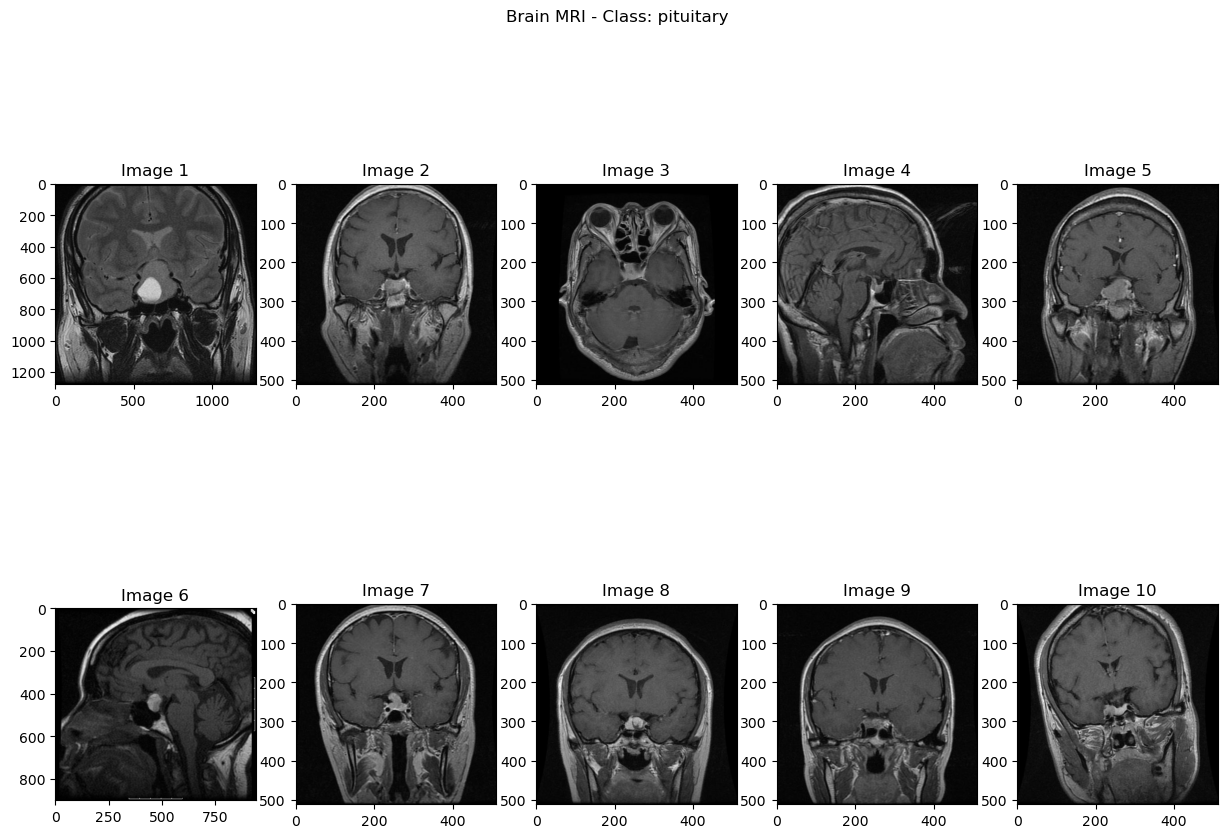

In [31]:
# Reding the images files and visualising them
# limiting the output to 10 images for each class


# creating a function to read and visualise the images
def load_and_visualize_data(image_folder, class_name, num_samples=10):
    # Get a list of image file paths with .jpg extention
    image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]
    # Randomly select a subset of images
    random_images = random.sample(image_files, min(num_samples, len(image_files)))

    
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(15, 10))
    fig.suptitle(f'Brain MRI - Class: {class_name}')
   # Now you can use the axes array to access individual subplots
    for i in range(2):
        for j in range(num_samples // 2):
            # Access subplot at row i, column j
            ax = axes[i, j]

            # Calculate the index in the original list
            index = i * (num_samples // 2) + j

            # Check if the index is within the range of the number of images
            if index < len(random_images):
                image_file = random_images[index]
                image_path = os.path.join(image_folder, image_file)
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                ax.imshow(img)
                ax.set_title(f'Image {index + 1}')

    plt.show()

# Example folder paths (replace with your actual paths)
class_1_image_folder = "./data/Training/glioma"
class_2_image_folder = "./data/Training/meningioma"
class_3_image_folder = "./data/Training/notumor"
class_4_image_folder = "./data/Training/pituitary"

# Load and visualize a random subset of images for each class
load_and_visualize_data(class_1_image_folder, "glioma", num_samples=10)
load_and_visualize_data(class_2_image_folder, "meningioma", num_samples=10)
load_and_visualize_data(class_3_image_folder, "notumor", num_samples=10)
load_and_visualize_data(class_4_image_folder, "pituitary", num_samples=10)
